# Feature Extraction

Feature extraction is a dimensionality reduction procedure that lowers the initial set of raw data into a smaller group. 

Principal Component Analysis (PCA) is an excellent example of dimensionality reduction.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 8)

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

## Automobile Dataset

We will use the Automobile Data Set [https://archive.ics.uci.edu/ml/datasets/automobile] from the UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]. It includes categorical and continuous variables. 

In [2]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", 
           "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", 
           "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head(3)

,symboling,normalized_losses,make,fuel_type,...,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,...,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,...,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,...,5000.0,19,26,16500.0


### Analyzing missing values

In [4]:
# Detecting missing values
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [5]:
# Removing the missing values
df.dropna(inplace=True)
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Getting the numerical variables

In [6]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [7]:
# Getting the numerical variables
var_num = [col for col in df.columns if (df[col].dtype == "float64" or df[col].dtype == "int64")]
var_num

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [8]:
df_num = df[var_num].copy()
df_num.head()

,symboling,normalized_losses,wheel_base,length,...,peak_rpm,city_mpg,highway_mpg,price
3,2,164.0,99.8,176.6,...,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,...,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,...,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,...,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,...,5800.0,23,29,16430.0


In [9]:
# Removing the dependent variable(price)
df_num.drop(['price'], axis=1, inplace=True)

## Correlation Analysis

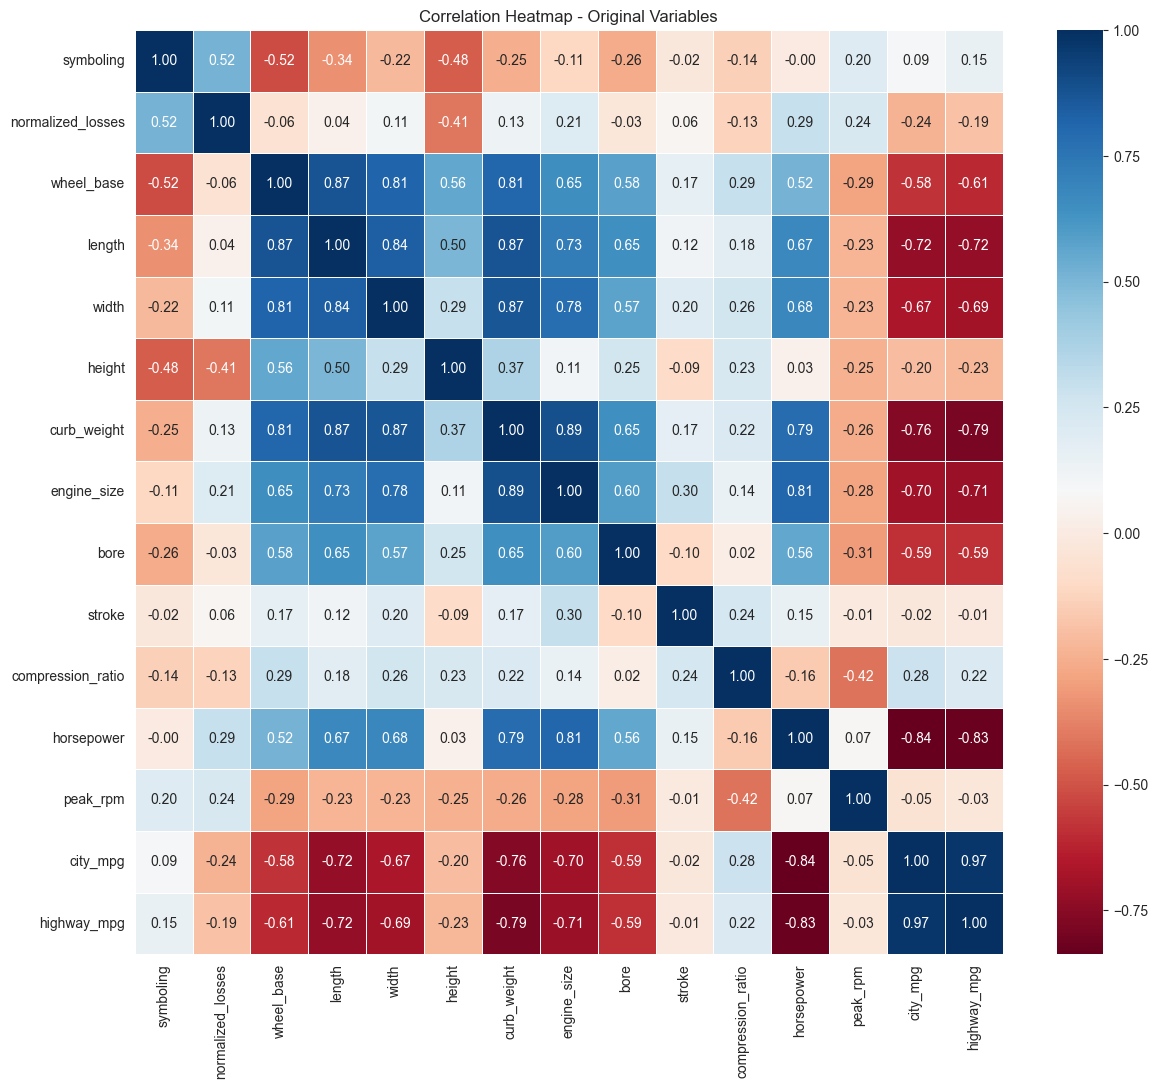

In [10]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap='RdBu', linewidth=0.5, 
            ax=ax).set(title='Correlation Heatmap - Original Variables');

There are several variables with high correlations. 

## Standardizing variables

Let's standardize the original variables.

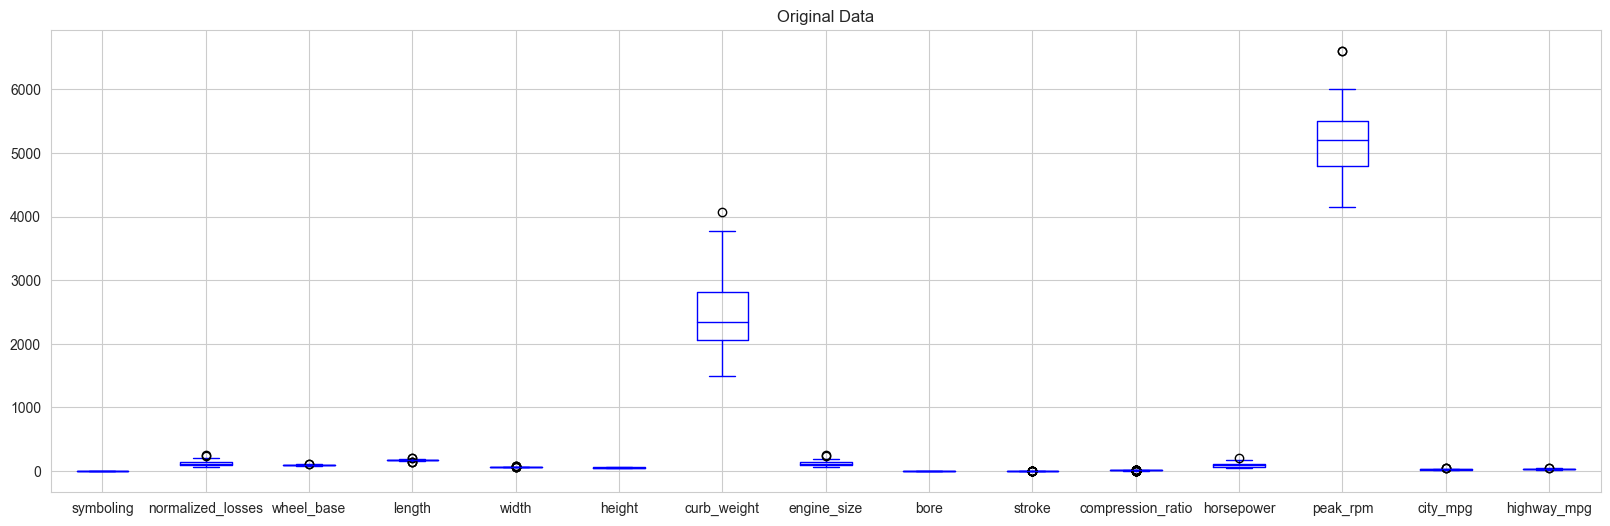

In [11]:
df_num.boxplot(figsize=(20,6), color='blue').set(title='Original Data');

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [13]:
df_num.head(3)

,symboling,normalized_losses,wheel_base,length,...,horsepower,peak_rpm,city_mpg,highway_mpg
3,2,164.0,99.8,176.6,...,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,...,115.0,5500.0,18,22
6,1,158.0,105.8,192.7,...,110.0,5500.0,19,25


In [14]:
df_num = pd.DataFrame(ss.fit_transform(df_num), columns=df_num.columns)
df_num.head(3)

,symboling,normalized_losses,wheel_base,length,...,horsepower,peak_rpm,city_mpg,highway_mpg
0,1.062912,1.206222,0.298157,0.364430,...,0.201279,0.831733,-0.414945,-0.323313
1,1.062912,1.206222,0.220504,0.364430,...,0.625812,0.831733,-1.402122,-1.565772
2,0.222101,1.037394,1.462948,1.766029,...,0.462530,0.831733,-1.237593,-1.099850


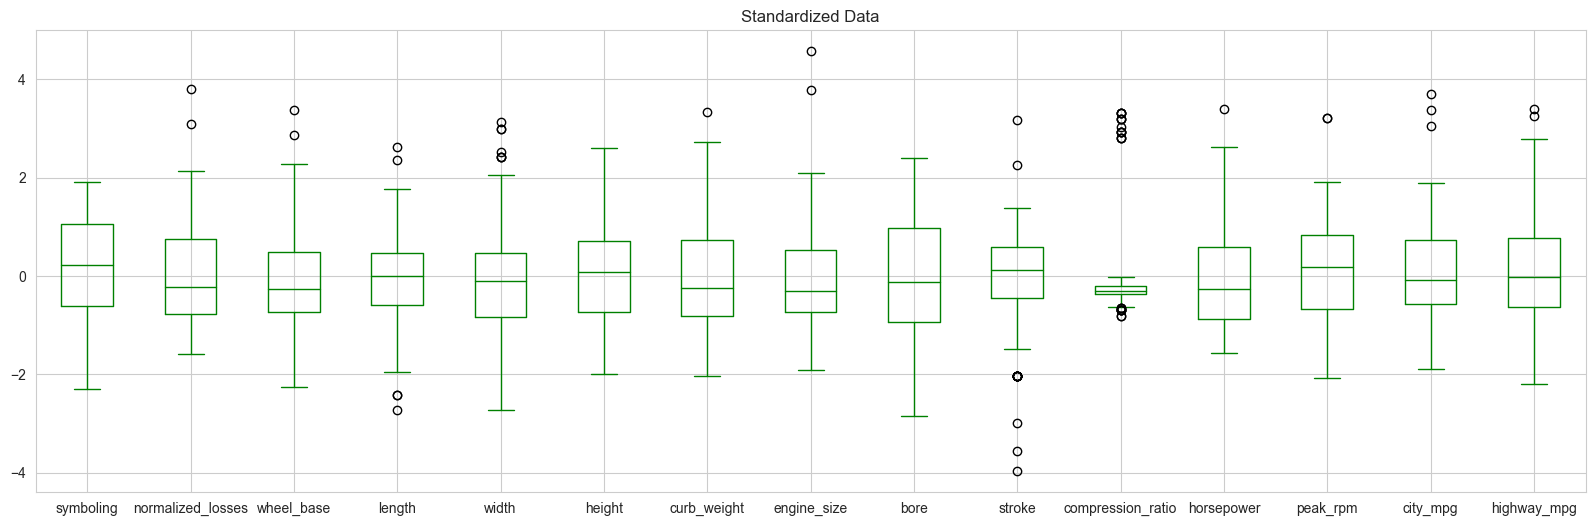

In [15]:
df_num.boxplot(figsize=(20,6), color='green').set(title='Standardized Data');

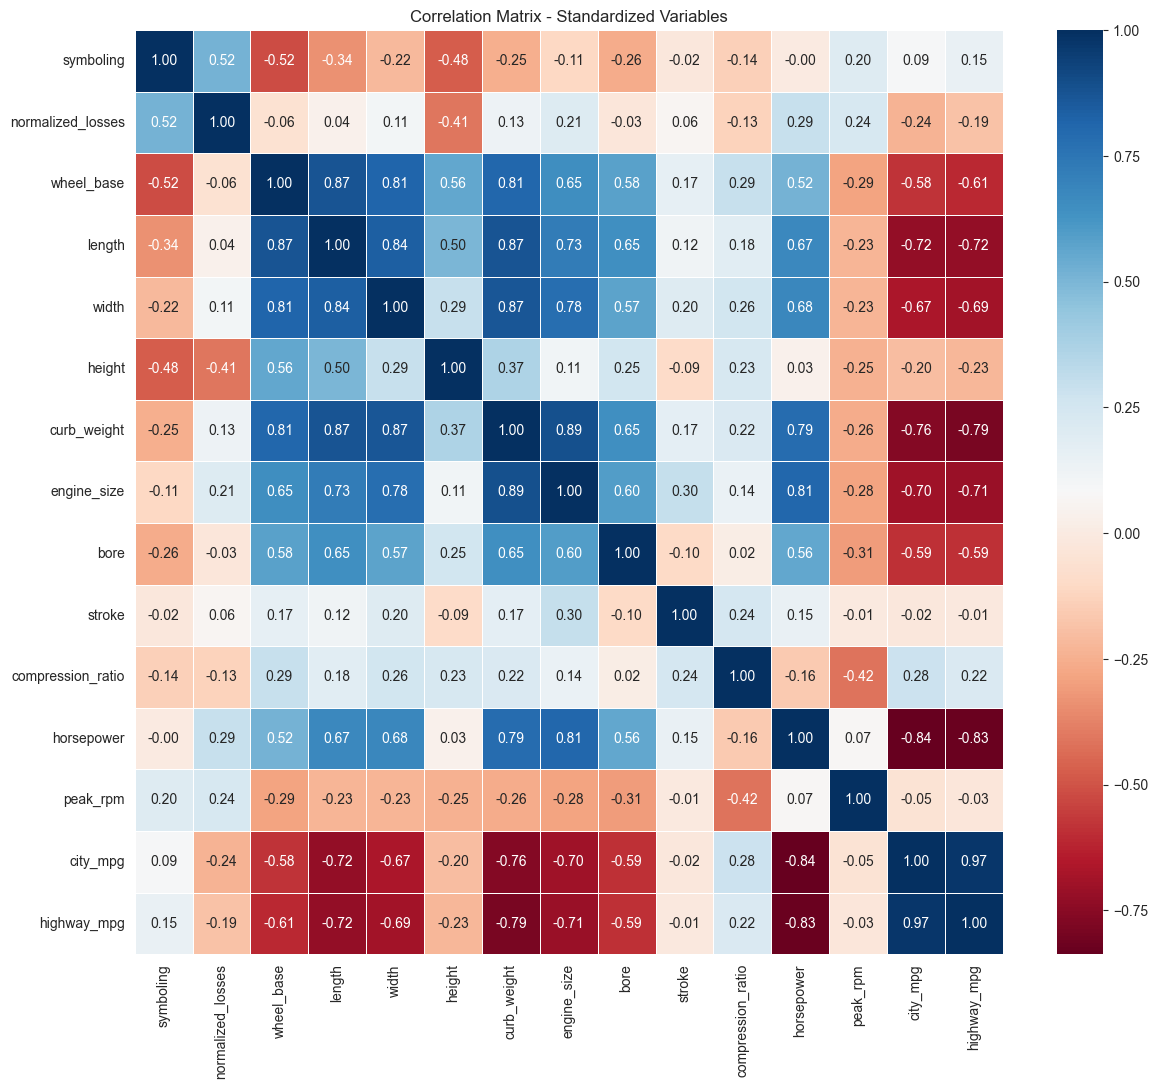

In [16]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap='RdBu', linewidth=0.5, \
            ax=ax).set(title='Correlation Matrix - Standardized Variables');

As you can see, the correlation matrix is the same.

## Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA

pca = PCA()

In [18]:
pca.fit(df_num)

PCA()

In [19]:
# Eigenvectors
pca.components_

array([[-0.11665217,  0.03524347,  0.32323479,  0.34690771,  0.33521788,
         0.14841288,  0.36043186,  0.32746137,  0.27428723,  0.05806998,
         0.04334627,  0.30813103, -0.08943903, -0.3172981 , -0.32354031],
       [ 0.40002026,  0.44461618, -0.20627975, -0.08328367, -0.02728656,
        -0.38910865, -0.0087353 ,  0.08889637, -0.03689051, -0.00742583,
        -0.36909679,  0.27382937,  0.34995003, -0.23823957, -0.20206344],
       [ 0.27683072,  0.2911054 ,  0.00992149, -0.01332257,  0.14930134,
        -0.26257858,  0.09829275,  0.22441745, -0.1466748 ,  0.52288474,
         0.50996956, -0.00589196, -0.22987788,  0.19997588,  0.19804952],
       [ 0.32605809,  0.16624824, -0.11532434, -0.02574563, -0.00425133,
        -0.10400865,  0.02657314,  0.05328942,  0.35091905, -0.62196935,
         0.10063437, -0.05608359, -0.55708888,  0.03964318,  0.05020999],
       [ 0.22208549,  0.41135232,  0.18289763,  0.1850087 ,  0.12320501,
         0.44170168,  0.05874001, -0.22833246, 

In [20]:
# Eigenvalues
pca.explained_variance_

array([7.13799129, 2.58332547, 1.55422602, 1.01370921, 0.74020779,
       0.48830948, 0.41436452, 0.35078345, 0.24551307, 0.20368729,
       0.11936743, 0.09311838, 0.08304282, 0.04605056, 0.0212399 ])

In [21]:
# Getting the principal components (the new variables)
data_pca = pca.transform(df_num)
print("Original shape:   ", df_num.shape)
print("Transformed shape:", data_pca.shape)

Original shape:    (159, 15)
Transformed shape: (159, 15)


Notice the original and transformed data have the same dimension. We did not set the number of components. Let's analyze the explained variance and determine the number of components or factors to keep. The explained variance refers to the variance explained by each principal component (eigenvectors). 

To get the amount of variance explained by each component, we can use:
- `explained_variance_`: The amount of variance explained by each of the selected components.
- `explained_variance_ratio_`: Proportion of variance explained by each of the selected components. To get the percentage of the explained variance multiply this number by 100.

In [22]:
# The percentage of variance explained by component
n_comp = np.linspace(1, pca.explained_variance_ratio_.size, pca.explained_variance_ratio_.size, dtype=int)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
for c in n_comp:
    print('Component = %i \t Variance = %.2f\tCumulative Variance = %.2f' 
           %(c, pca.explained_variance_ratio_[c-1]*100, cum_var_exp[c-1]*100))

Component = 1 	 Variance = 47.29	Cumulative Variance = 47.29
Component = 2 	 Variance = 17.11	Cumulative Variance = 64.40
Component = 3 	 Variance = 10.30	Cumulative Variance = 74.70
Component = 4 	 Variance = 6.72	Cumulative Variance = 81.41
Component = 5 	 Variance = 4.90	Cumulative Variance = 86.32
Component = 6 	 Variance = 3.23	Cumulative Variance = 89.55
Component = 7 	 Variance = 2.75	Cumulative Variance = 92.30
Component = 8 	 Variance = 2.32	Cumulative Variance = 94.62
Component = 9 	 Variance = 1.63	Cumulative Variance = 96.25
Component = 10 	 Variance = 1.35	Cumulative Variance = 97.60
Component = 11 	 Variance = 0.79	Cumulative Variance = 98.39
Component = 12 	 Variance = 0.62	Cumulative Variance = 99.00
Component = 13 	 Variance = 0.55	Cumulative Variance = 99.55
Component = 14 	 Variance = 0.31	Cumulative Variance = 99.86
Component = 15 	 Variance = 0.14	Cumulative Variance = 100.00


With four components, we got more than 80% of the whole variance. Therefore, we can transform our 15 initial variables into four new factors that are linear combinations of the old 15.

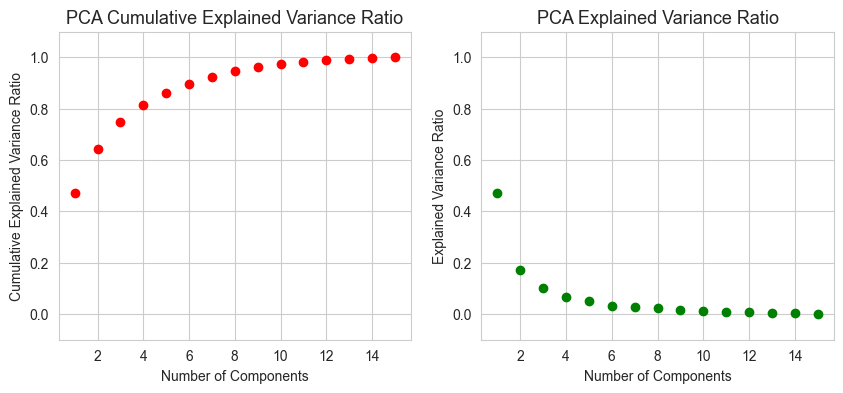

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(n_comp, np.cumsum(pca.explained_variance_ratio_),'ro')
plt.ylim(ymin=-0.1, ymax=1.1)
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=10)
plt.title('PCA Cumulative Explained Variance Ratio', fontsize=13)

plt.subplot(122)
plt.plot(n_comp, pca.explained_variance_ratio_,'go')
plt.ylim(ymin=-0.1, ymax=1.1)
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Explained Variance Ratio', fontsize=10)
plt.title('PCA Explained Variance Ratio', fontsize=13);

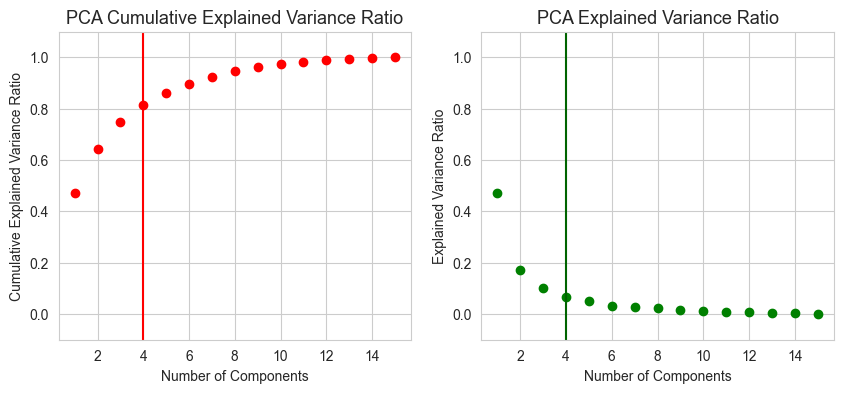

In [24]:
# Adding vertical lines at n = 4
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(n_comp, np.cumsum(pca.explained_variance_ratio_),'ro')
plt.axvline(4, color='red')
plt.ylim(ymin=-0.1, ymax=1.1)
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=10)
plt.title('PCA Cumulative Explained Variance Ratio', fontsize=13)

plt.subplot(122)
plt.plot(n_comp, pca.explained_variance_ratio_,'go')
plt.axvline(4, color='darkgreen')
plt.ylim(ymin=-0.1, ymax=1.1)
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Explained Variance Ratio', fontsize=10)
plt.title('PCA Explained Variance Ratio', fontsize=13);

In [25]:
# Setting the number of components to 80% of the total variance
pca2 = PCA(n_components=0.8, whiten=True)

In [26]:
pca2.fit(df_num)

PCA(n_components=0.8, whiten=True)

In [27]:
data_pca2 = pca2.transform(df_num)
print("Original shape:   ", df_num.shape)
print("Transformed shape:", data_pca2.shape)

Original shape:    (159, 15)
Transformed shape: (159, 4)


In [28]:
# Variance explanied for each component
print('Variance(factor 1)  = %.2f' %(pca2.explained_variance_ratio_[0] * 100)) 
print('Variance(factor 2)  = %.2f' %(pca2.explained_variance_ratio_[1] * 100)) 
print('Variance(factor 3)  = %.2f' %(pca2.explained_variance_ratio_[2] * 100)) 
print('Variance(factor 4)  = %.2f' %(pca2.explained_variance_ratio_[3] * 100)) 
print('\033[1m' + 'Cumulative Variance = %.2f' %( np.cumsum(pca2.explained_variance_ratio_)[-1]*100) + '\033[1m')

Variance(factor 1)  = 47.29
Variance(factor 2)  = 17.11
Variance(factor 3)  = 10.30
Variance(factor 4)  = 6.72
Cumulative Variance = 81.41


The first principal component axis is selected in a way such that it explains most of the variation in the data and is closest to all observations.

### Adding the new variables to `df_num`

In [29]:
df_num['f1'] = data_pca2[:,0]
df_num['f2'] = data_pca2[:,1]
df_num['f3'] = data_pca2[:,2]
df_num['f4'] = data_pca2[:,3]

In [30]:
df_num.head()

,symboling,normalized_losses,wheel_base,length,...,f1,f2,f3,f4
0,1.062912,1.206222,0.298157,0.364430,...,0.077684,0.809769,0.427264,-0.540277
1,1.062912,1.206222,0.220504,0.364430,...,0.635244,1.354966,0.110227,-0.634037
2,0.222101,1.037394,1.462948,1.766029,...,1.272422,0.532719,0.214222,-1.134382
3,0.222101,1.037394,1.462948,1.766029,...,1.547263,0.829788,0.030284,-1.328819
4,1.062912,1.994089,0.569942,0.381841,...,0.127996,1.234534,-0.759140,0.828195


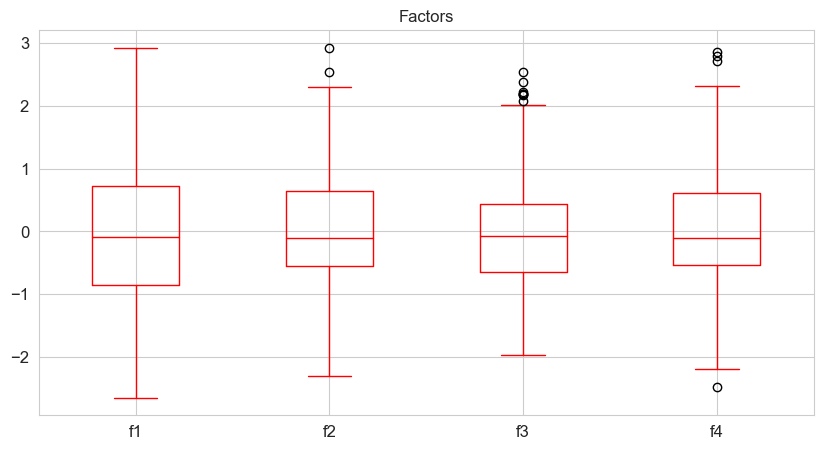

In [31]:
df_num[['f1','f2','f3','f4']].boxplot(figsize=(10,5), fontsize=12, color='r').set(title='Factors');

The new variables `f1`, `f2`, `f3` and `f4` are standardized and they are perpendicular to each other.

In [32]:
df_num[['f1','f2','f3','f4']].describe().round(4)

,f1,f2,f3,f4
count,159.0000,159.0000,159.0000,159.0000
mean,0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-2.6416,-2.2972,-1.9660,-2.4657
25%,-0.8451,-0.5444,-0.6391,-0.5318
50%,-0.0902,-0.0969,-0.0773,-0.0992
75%,0.7274,0.6387,0.4359,0.6067
max,2.9179,2.9142,2.5282,2.8487


### From the original variables to the new ones

How to get the new variables (`f1`,`f2`,`f3`,`f4`) using the original ones?

Factor variables are linear combinations of the original ones. Let's see the coefficients.

In [33]:
pca2.components_

array([[-0.11665217,  0.03524347,  0.32323479,  0.34690771,  0.33521788,
         0.14841288,  0.36043186,  0.32746137,  0.27428723,  0.05806998,
         0.04334627,  0.30813103, -0.08943903, -0.3172981 , -0.32354031],
       [ 0.40002026,  0.44461618, -0.20627975, -0.08328367, -0.02728656,
        -0.38910865, -0.0087353 ,  0.08889637, -0.03689051, -0.00742583,
        -0.36909679,  0.27382937,  0.34995003, -0.23823957, -0.20206344],
       [ 0.27683072,  0.2911054 ,  0.00992149, -0.01332257,  0.14930134,
        -0.26257858,  0.09829275,  0.22441745, -0.1466748 ,  0.52288474,
         0.50996956, -0.00589196, -0.22987788,  0.19997588,  0.19804952],
       [ 0.32605809,  0.16624824, -0.11532434, -0.02574563, -0.00425133,
        -0.10400865,  0.02657314,  0.05328942,  0.35091905, -0.62196935,
         0.10063437, -0.05608359, -0.55708888,  0.03964318,  0.05020999]])

In [34]:
pca2.components_.T

array([[-0.11665217,  0.40002026,  0.27683072,  0.32605809],
       [ 0.03524347,  0.44461618,  0.2911054 ,  0.16624824],
       [ 0.32323479, -0.20627975,  0.00992149, -0.11532434],
       [ 0.34690771, -0.08328367, -0.01332257, -0.02574563],
       [ 0.33521788, -0.02728656,  0.14930134, -0.00425133],
       [ 0.14841288, -0.38910865, -0.26257858, -0.10400865],
       [ 0.36043186, -0.0087353 ,  0.09829275,  0.02657314],
       [ 0.32746137,  0.08889637,  0.22441745,  0.05328942],
       [ 0.27428723, -0.03689051, -0.1466748 ,  0.35091905],
       [ 0.05806998, -0.00742583,  0.52288474, -0.62196935],
       [ 0.04334627, -0.36909679,  0.50996956,  0.10063437],
       [ 0.30813103,  0.27382937, -0.00589196, -0.05608359],
       [-0.08943903,  0.34995003, -0.22987788, -0.55708888],
       [-0.3172981 , -0.23823957,  0.19997588,  0.03964318],
       [-0.32354031, -0.20206344,  0.19804952,  0.05020999]])

In [35]:
print('Number of original features:', pca2.n_features_in_)
print('Feature names:', pca2.feature_names_in_)

Number of original features: 15
Feature names: ['symboling' 'normalized_losses' 'wheel_base' 'length' 'width' 'height'
 'curb_weight' 'engine_size' 'bore' 'stroke' 'compression_ratio'
 'horsepower' 'peak_rpm' 'city_mpg' 'highway_mpg']


In [36]:
# Creating a dataframe with the principal components
comp = pd.DataFrame(pca2.components_.T, index=pca2.feature_names_in_, columns=['f1','f2','f3','f4'])
comp

,f1,f2,f3,f4
symboling,-0.116652,0.400020,0.276831,0.326058
normalized_losses,0.035243,0.444616,0.291105,0.166248
wheel_base,0.323235,-0.206280,0.009921,-0.115324
length,0.346908,-0.083284,-0.013323,-0.025746
width,0.335218,-0.027287,0.149301,-0.004251
height,0.148413,-0.389109,-0.262579,-0.104009
curb_weight,0.360432,-0.008735,0.098293,0.026573
engine_size,0.327461,0.088896,0.224417,0.053289
bore,0.274287,-0.036891,-0.146675,0.350919
stroke,0.058070,-0.007426,0.522885,-0.621969


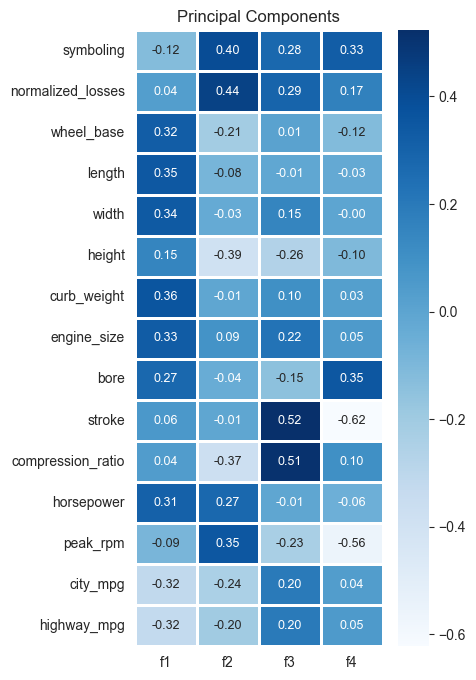

In [37]:
# visualizing the relationship between the original features and the principal components
fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(comp, annot=True, fmt='.2f', cmap='Blues', linewidth=1, annot_kws={"size":9}, 
            ax=ax).set(title='Principal Components');

### Visualizing Data in two Dimension Scatter Plot

The two first components explain 64.40% of the total variance. Let us now visualize the price into the two components space with the help of a scatter plot.

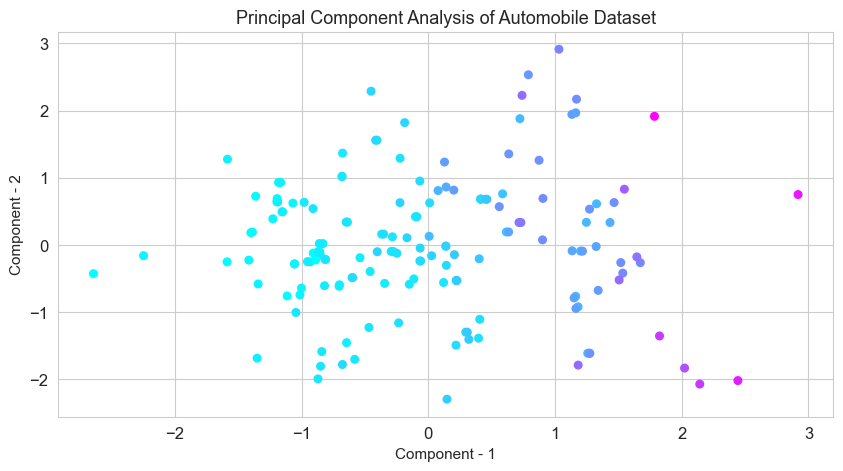

In [38]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Component - 1',fontsize=11)
plt.ylabel('Component - 2',fontsize=11)
plt.title("Principal Component Analysis of Automobile Dataset",fontsize=13)
plt.scatter(df_num.f1, df_num.f2, c=df['price'], cmap='cool', s=30);

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html